# assginment 1- Zahra Parham (2122841)

### 1- Bandit Problem

#### 1

In [1]:
import numpy as np
class Bandit():
    def __init__(self, variance, arms):
        self.variance = variance
        self.mu = np.random.normal(0, 1, arms)


    
    def pull(self, action: int) -> float:
        """
        This function get an action as an input and give the reward related to that action as an output

        Parameters:
            action (int): The number of action

        Returns:
            reward (float): The reward related to each action
       """

        reward = np.random.normal(self.mu[action], 1)

        return (f"This is the reward ={reward} for action = {action} ")

In [2]:
bandit = Bandit( 1, 10)
bandit.pull(action = 3)

'This is the reward =-0.6896135677196256 for action = 3 '

#### 2

In [76]:
import numpy as np

np.random.seed(100)

        
class EpsilonGreedy():
    '''
    :param int arms: number of bandit
    :type arr q_value: the q value for each action
    :param float epsilon: the amount for epsilon parameter
    :param int action_selection: The number of times that action is selected
    :param int total_actions: Number of actions selected
    :param int total_rewards: Total amount of rewards
    '''
    
    def __init__(self, arms, epsilon, variance):
        self.variance = variance
        self.q_value = np.zeros(arms)
        self.epsilon = epsilon
        self.action_selection = np.zeros(arms)          
        self.total_actions = 0
        self.total_rewards = 0
        self.all_rewards = []
        self.mu = np.random.normal(0, 1, arms)
        self.sum_reward = np.zeros(arms)
        
    def pull(self, action):
        """
        This function get an action as an input and give the reward related to that action as an output

        Parameters:
            action (int): The number of action

        Returns:
            reward (float): The reward related to each action
       """
        
        #reward = np.random.normal(action, scale=self.variance)
        reward = np.random.normal(self.mu[action], 1)

        #reward = np.random.normal(1, action)

        return reward


        
    def pick_action(self):
        """
        This function pick an action based on Epsilon greedy algorithm

        
        Returns:
            action (int): The action that is selected
       """
        random = np.random.uniform(0, 1, 1)
        if random < self.epsilon:
            action  = np.random.choice(len(self.q_value))
        else:
            action = np.argmax(self.q_value)
        return action
            
    def update_qvalue(self, reward, action):
        """
        This function update the Q value for each action
        
        parameters:
        reward (float): the reward that will estimate from pull function
        action (int): the action that is selected

        
        Returns: None
       """
        self.total_actions += 1
        self.total_rewards += reward
        average_rewards = self.total_rewards / self.total_actions
        self.all_rewards.append(reward)
        self.action_selection[action] += 1
        self.sum_reward[action] += reward
        self.q_value[action] = self.sum_reward[action] / self.action_selection[action]
        #self.q_value[action] = self.q_value[action] + (1 / self.action_selection[action]) *(reward - self.q_value[action])
        return average_rewards

    def regret(self):
        regrets = []
        q_star = np.max(self.q_value)
        all_rewards_cumulative = np.cumsum(self.all_rewards)
        for i in range(2000):
            regret = i * q_star - all_rewards_cumulative[i]
            regrets.append(regret)
        return regrets
        
    def iterations(self, iter):
        """
        This function at each episode run the epsilon greedy algorithm
        
        parameters:
        iter (int): Number of total episode

        
        Returns: 
        all_reward (arr): Reward is gained in each epsiode
       """
        final = []
        #average_rewards = 0
        for _ in range(iter):
            action = self.pick_action()
            reward = self.pull(action)
            average_reward = self.update_qvalue(reward, action)
            final.append(average_reward)
            #average_rewards +=reward
        #final = average_rewards / 200
            
        return final


In [46]:

def different_epsilons(arms, epsilons, variance, iterations):
    rewards = []
    regrets = []
    for epsilon in epsilons:
        
        #for _ in range(100):
        agent = EpsilonGreedy(arms, epsilon, variance)
        reward = agent.iterations(iterations)
        rewards.append(reward)
        regret = agent.regret()
        regrets.append(regret)
    
    return rewards, regrets


In [47]:
import matplotlib.pyplot as plt


epsilons = [0.1, 0.01, 0]

iterations = 2000
rewards, regret =  different_epsilons(1000, epsilons, 1, iterations)



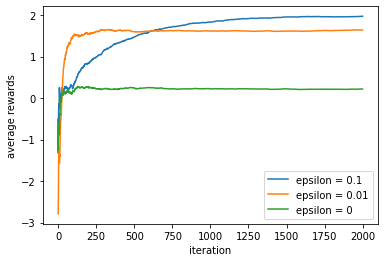

In [48]:
for i in range(len(epsilons)):
    plt.plot(rewards[i],
        label="epsilon = {}".format(epsilons[i]),
    )
    
plt.xlabel("iteration")
plt.ylabel("average rewards")
plt.legend()
plt.show()


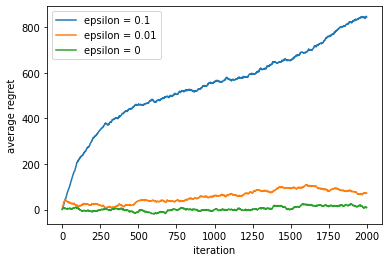

In [49]:
for i in range(len(epsilons)):
    plt.plot(regret[i],
        label="epsilon = {}".format(epsilons[i]),
    )
    
plt.xlabel("iteration")
plt.ylabel("average regret")
plt.legend()
plt.show()

As I expected the plot with epsilon = 0.1 acts better than the others since it explored as enough as it needed but the plot with epsilon = 0.01 has a very low speed to converge but I expect that in long term it would be better that plot with epsilon = 0.1 

#### 3


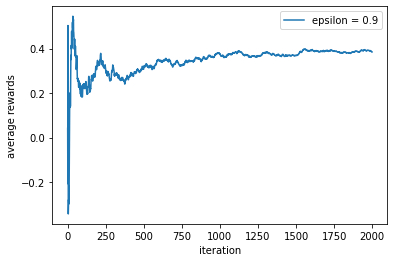

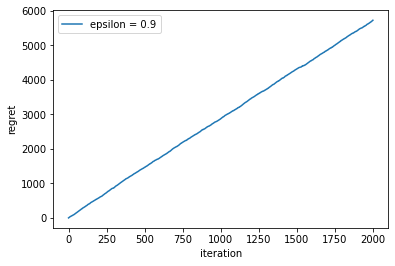

In [21]:

epsilon = 0.9
agent = EpsilonGreedy(1000, 0.9, 1)
ave_reward = agent.iterations(iterations)
regret = agent.regret()
iterations = 2000

plt.plot(ave_reward,label="epsilon = {}".format(epsilon),)
    
plt.xlabel("iteration")
plt.ylabel("average rewards")
plt.legend()
plt.show()

plt.plot(regret, label="epsilon = {}".format(epsilon))
plt.xlabel("iteration")
plt.ylabel("regret")
plt.legend()
plt.show()



I expected that it would not work efficiently since it explores too much . by epsilon = 0.9, we assume that 90 percent of times the agent will explore randomly, and for 10 percent, it will exploit, so it's not an efficient amount for epsilon since most of the time the agent chooses its action randomly

#### 4

In [22]:
class Optimistic(EpsilonGreedy):
    def __init__(self, arms, epsilon, variance, initial_value):
        super().__init__( arms, epsilon, variance)
        self.total_actions = 1
        self.total_rewards = initial_value
        #self.initial_value = initial_value
    
    def pick_action(self):
        return np.argmax(self.q_value) 
    
    
    

In [23]:
def optimistic_initial(arms, epsilons, variance, iterations, initial_value):
    agent = Optimistic(arms, epsilons, variance, initial_value)
    reward = agent.iterations(iterations)
    return reward

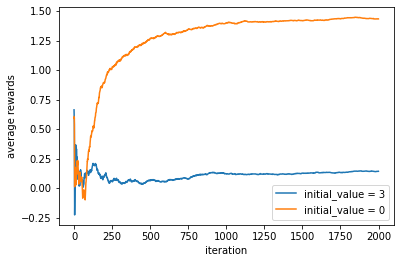

In [27]:


epsilons = 0

iterations = 2000
rewards_3 =  optimistic_initial(1000, epsilons, 1, iterations, 3)
rewards_0 =  optimistic_initial(1000, epsilons, 1, iterations, 0)



plt.plot(
    rewards_3, 
    label="initial_value = {}".format(3),
    )
plt.plot(
    rewards_0, 
    label="initial_value = {}".format(0),
    )
plt.xlabel("iteration")
plt.ylabel("average rewards")
plt.legend()
plt.show()


I expected that the optimistic plot with an initial value = 3 perform better since, in the optimistic algorithm, we assume the initial value some considerable amount, making the agent explore its first steps. So the plot with an initial value = 0 means that the agent will not explore at all, so we would not expect it performs efficiently.

#### 5

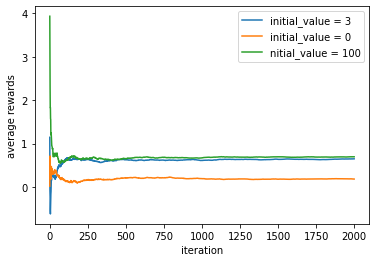

In [66]:


epsilons = 0

iterations = 2000
rewards_100 =  optimistic_initial(1000, epsilons, 1, iterations, 10)
rewards_3 =  optimistic_initial(1000, epsilons, 1, iterations, 3)
rewards_0 =  optimistic_initial(1000, epsilons, 1, iterations, 0)



plt.plot(
    rewards_3, 
    label="initial_value = {}".format(3),
    )
plt.plot(
    rewards_0, 
    label="initial_value = {}".format(0),
    )
plt.plot(
    rewards_100, 
    label="nitial_value = {}".format(100),
    )
plt.xlabel("iteration")
plt.ylabel("average rewards")
plt.legend()
plt.show()


I expected that it does not differ from the plot with an initial value of 3. Since we can consider the initial value of any significant numbers, it should be bigger than the maximum reward, making the agent explore each action at the beginning. So if we even consider the initial value to 100, it's temporary, and the effect of this hack is only temporary and can mostly be noticed at the beginning.

#### 6

Implement the UCB algorithm on the 10-armed testbed described above, for three
values of the parameters c: 0.2, 1, and 5. In a single plot, compare their performances
as measured by the average reward across n=2000 runs as a function of the number of
pulls. Explain what you expected to see and what you actually saw.

In [67]:
class UBC(EpsilonGreedy):
    def __init__(self, arms, c, variance):
        super().__init__( arms, c, variance)
        self.C = c
        self.ubc = 0
        #self.initial_value = initial_value
    
    def update_qvalue(self, reward, action):
        self.total_actions += 1
        self.total_rewards += reward
        average_rewards = self.total_rewards / self.total_actions
        self.sum_reward[action] += reward
        self.action_selection[action] += 1
        self.q_value[action] = self.sum_reward[action] / self.action_selection[action]
        self.ubc =np.sqrt(np.log(self.total_actions) / self.action_selection[action])
        self.q_value[action] = self.q_value[action] +self.C * self.ubc
        return average_rewards
    
    def pick_action(self):
        return np.argmax(self.q_value)
        
    

In [68]:
def different_c(arms, C, variance, iterations):
    rewards = []
    for c in C:
        agent = UBC(arms, c, variance)
        reward = agent.iterations(iterations)
        rewards.append(reward)
    return rewards




In [69]:

C = [0.2, 1, 5]

iterations = 2000
rewards =  different_c(1000, C, 1, iterations)



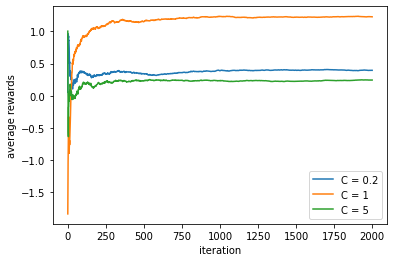

In [71]:
for i in range(len(C)):
    plt.plot(
        rewards[i], 
        label="C = {}".format(C[i]),
    )
plt.xlabel("iteration")
plt.ylabel("average rewards")
plt.legend()
plt.show()


In the UCB algorithm, the c is the parameter that will specify how much the agent will explore, so based on this, I expected that the plot with c = 1 acts better than the two others since it explores adequate and c = 0.2 is not enough to explore. The plot with c = 5 is too much exploration for the agent. 

#### 7

In [99]:
class GradientBandit(EpsilonGreedy):
    
    def __init__(self, arms, variance, alpha, baseline):
        super().__init__(arms,alpha, variance)
        self.H = np.zeros(arms)
        self.alpha = alpha
        self.pi_value = np.zeros(arms)
        self.arms = arms
        self.baseline = baseline
        self.mu = np.random.normal(4, 1, arms)


        
    def pick_action(self):
            return np.argmax(self.pi)

    
    def update_qvalue(self, reward, action):
        self.total_actions += 1
        self.total_rewards += reward
        average_rewards = self.total_rewards / self.total_actions
        average_r = 0 if (not baseline) else average_rewards
        self.H[action] = self.H[action] + self.alpha * (reward - average_r) * (1 - self.pi_value[action])
        self.H[:action] = self.H[:action] - self.alpha * (reward - average_r) * self.pi_value[:action]
        self.H[action + 1:] = self.H[action + 1:] - self.alpha * (reward - average_r) * self.pi_value[action + 1:]

        self.pi()

        return average_rewards


    
    def pi(self):
        sum = np.sum(np.exp(np.array(self.H)))
        for i in range(self.arms):
            self.pi_value[i] = np.exp(self.H[i]) / sum



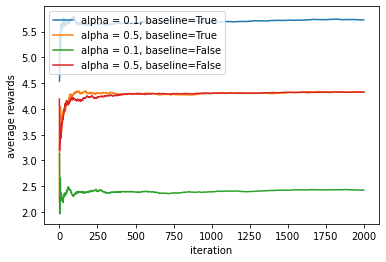

In [101]:
def different_alpha(arms, alpha, baseline, variance, iterations):
    rewards = []
    for i in range(len(alpha)):
        agent = GradientBandit(arms, variance, alpha[i], baseline[i])
        reward = agent.iterations(iterations)
        rewards.append(reward)
    return rewards

alpha = [0.1, 0.5, 0.1, 0.5]
baseline = [True, True, False, False]

iterations = 2000
rewards =  different_alpha(1000, alpha, baseline, 1, iterations)


for i in range(len(alpha)):
    plt.plot(
        rewards[i], 
        label="alpha = {}, baseline={}".format(alpha[i], baseline[i]),
    )
plt.xlabel("iteration")
plt.ylabel("average rewards")
plt.legend()
plt.show()



I expected the Gradient Bandit with alpha = 0.1 and baseline = True to act more efficient than the others plot since its exploration is more reasonable and sufficient

#### 8

Based on the performance that I observed through all these questions, I will rank these plots like this(based on regret):

1- optimistic initial value ---> with initial value > reward average
2- UCB with c=1
3- epsilon greedy with epsilon=0.1
gradient bandit with baseline and alpha = 0.1


### 2- Dynamic Programming

#### 1

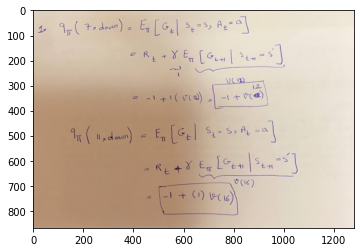

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('1.jpeg')
imgplot = plt.imshow(img)
plt.show()

#### 2

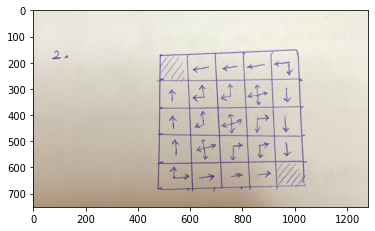

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('2.jpeg')
imgplot = plt.imshow(img)
plt.show()

#### 3

for this question I tried to implement the policy iteration and value iteration.
I got help from the link below for the implementation:

https://github.com/inesjpedro/policy_iteration_gridworld/blob/264b58b419251a0c13b2825a89526c48d187dbd6/solve_maze.py#L29

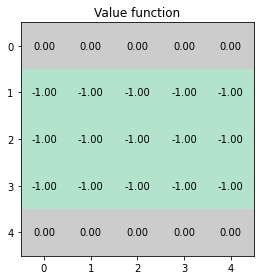

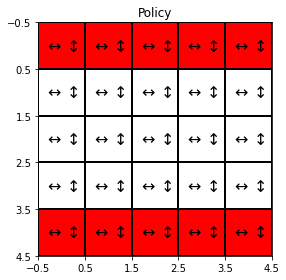

/Users/mina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:201: RuntimeWarning: overflow encountered in double_scalars
/Users/mina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:207: RuntimeWarning: invalid value encountered in double_scalars


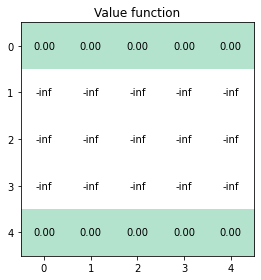

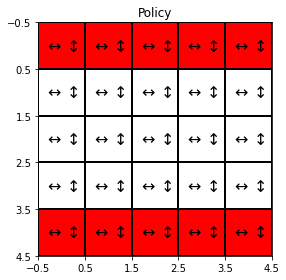

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


class Blob():
    def __init__(self, SIZE, v_init):
        self.SIZE = SIZE
        self.x = np.random.randint(0, SIZE)
        self.y = np.random.randint(0, SIZE)
        self.goalstate = [[0,0], [SIZE - 1, SIZE - 1]]
        self.v = v_init * np.ones((SIZE, SIZE))
        self.pi =  np.ones((SIZE, SIZE, 4))
        self.action_choice = [0,1,2,3]

        
    def get_next_state(self, x, y, a, n):
        

    # Compute next state according to the action
        if a == 0:
            s_prime_x = x
            s_prime_y = max(0, y - 1)
        elif a == 1:
            s_prime_x = max(0, x - 1)
            s_prime_y = y
        elif a == 2:
            s_prime_x = x
            s_prime_y = min(n - 1, y + 1)
        else:
            s_prime_x = min(n - 1, x + 1)
            s_prime_y = y

        return s_prime_x, s_prime_y

#     def action(self, choice):
#         '''
#         Gives us 4 total movement options. (0,1,2,3)
#         '''
#         if choice == 0:
#             self.move(x=1, y=0)
#         elif choice == 1:
#             self.move(x=0, y=1)
#         elif choice == 2:
#             self.move(x=-1, y=0)
#         elif choice == 3:
#             self.move(x=0, y=-1)

#     def move(self, x=False, y=False):

#         # If no value for x, move randomly
#         if not x:
#             self.x += np.random.randint(-1, 2)
#         else:
#             self.x += x

#         # If no value for y, move randomly
#         if not y:
#             self.y += np.random.randint(-1, 2)
#         else:
#             self.y += y


        # If we are out of bounds, fix!
#         if self.x < 0:
#             self.x = 0
#         elif self.x > self.SIZE-1:
#             self.x = self.SIZE-1
#         if self.y < 0:
#             self.y = 0
#         elif self.y > self.SIZE-1:
#             self.y = self.SIZE-1

    def reward(self, state):
        if state in self.goalstate:
            return 0
        else:
            return -1

    def initialization(self):
        for i in self.goalstate:
            self.v[i] = 0

    def show_plot_v(self):

        self.initialization()

        fig, ax = plt.subplots()
        im = ax.imshow(self.v, cmap='Pastel2', interpolation='nearest')

        
        for i in range(5):
            for j in range(5):
                text = ax.text(j, i, "{:.2f}".format(self.v[i, j]), ha="center", va="center", color="black")

        ax.set_title("Value function")
        fig.tight_layout()
        plt.show()
        
    def get_arrow(self, best_action):

        best_actions = np.where(best_action == np.amax(best_action))[0]

        if len(best_actions) == 1:
            if 0 in best_actions:
                return r"$\leftarrow$"
            if 1 in best_actions:
                return r"$\uparrow$"
            if 2 in best_actions:
                return r"$\rightarrow$"
            else:
                return r"$\downarrow$"

        elif len(best_actions) == 2:
            if 0 in best_actions and 1 in best_actions:
                return r"$\leftarrow \uparrow$"
            elif 0 in best_actions and 2 in best_actions:
                return r"$\leftrightarrow$"
            elif 0 in best_actions and 3 in best_actions:
                return r"$\leftarrow \downarrow$"
            elif 1 in best_actions and 2 in best_actions:
                return r"$\uparrow \rightarrow$"
            elif 1 in best_actions and 3 in best_actions:
                return r"$\updownarrow$"
            elif 2 in best_actions and 3 in best_actions:
                return r"$\downarrow \rightarrow$"

        elif len(best_actions) == 3:
            if 0 not in best_actions:
                return r"$\updownarrow \rightarrow$"
            elif 1 not in best_actions:
                return r"$\leftrightarrow \downarrow$"
            elif 2 not in best_actions:
                return r"$\leftarrow \updownarrow$"
            else:
                return r"$\leftrightarrow \uparrow$"

        else:
            return r"$\leftrightarrow \updownarrow$"
    
    def show_plot_pi(self):
        data = self.v.copy()
        # for i in self.goalstate:
        #     self.pi[i] = 10

        # create discrete colormap
        cmap = colors.ListedColormap(['grey', 'white', 'red'])
        bounds = [-11, -2, 0, 12]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        fig, ax = plt.subplots()
        ax.imshow(data, cmap=cmap, norm=norm)

        # draw gridlines
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        ax.set_xticks(np.arange(-.5, self.SIZE, 1))
        ax.set_yticks(np.arange(-.5, self.SIZE, 1))

        # Loop over data dimensions and create text annotations.
        for i in range(self.SIZE):
            for j in range(self.SIZE):
                arrow = self.get_arrow(self.pi[i, j:])
                text = ax.text(j, i, arrow, fontsize=16, ha="center", va="center", color="black")

        ax.set_title("Policy")
        fig.tight_layout()
        plt.show()
        
    def evaluation(self, x, y):
        v=0
        v += self.v[self.x, self.y]
        
        self.v[x, y] = -1 + 0.25 * v
        print(self.v)


player = Blob(5, -1)
player.show_plot_v()
player.show_plot_pi()
policy_stable = False
while not policy_stable:
    i+=1
    #policy_evaluation()
    theta = 0.01
    delta = theta + 1
    iter = 0
    while delta >= theta:
        old_v = player.v.copy()
        delta = 0
        
        for x in range(5):
            for y in range(5):
                #belman()
#                 if [x,y] in player.goalstate:
#                     player.v[x,y] = 0
                    
                
                total = 0
                for a in range(4):
                    s_prime_x, s_prime_y = player.get_next_state(x, y, a, 5)
                    total += player.pi[x, y, a] * (player.reward([s_prime_x, s_prime_y]) + 1 * old_v[s_prime_x, s_prime_y])
                    player.v[x, y] = total


                    

                delta = max(delta, abs(old_v[x, y] - player.v[x, y]))
                
        iter += 1
    player.show_plot_v()
        

    #policy_stable()
    
    policy_stable = True

    for x in range(5):
        for y in range(5):
            old_pi = player.pi[x, y, :].copy()

            # Iterate all actions
            best_actions = []
            max_v = None
            for a in range(4):
                # Compute next state
                s_prime_x, s_prime_y = player.get_next_state(x, y, a, 5)
                # Get value
                curr_val = player.reward([s_prime_x, s_prime_y]) + 1 * player.v[s_prime_x, s_prime_y]

                if max_v is None:
                    max_v = curr_val
                    best_actions.append(a)
                elif curr_val > max_v:
                    max_v = curr_val
                    best_actions = [a]
                elif curr_val == max_v:
                    best_actions.append(a)

            # Define new policy
            for a in best_actions:
                player.pi[x, y, a] = 1 
            #define_new_policy(pi, x, y, best_actions, env.actions)

            # Check whether the policy has changed
            if not (old_pi == player.pi[x, y, :]).all():
                policy_stable = False
        
    player.show_plot_pi()
#plot

        

    




In [110]:
player = Blob(5, -1)
for x in range(5):
    for y in range(5):
        player.evaluation(x,y)
        


[[-1.25 -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]]
[[-1.25 -1.25 -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]]
[[-1.25 -1.25 -1.25 -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]
 [-1.   -1.   -1.   -1.   -1.  ]]
[[-1.25   -1.25   -1.25   -1.3125 -1.    ]
 [-1.     -1.     -1.     -1.     -1.    ]
 [-1.     -1.     -1.     -1.     -1.    ]
 [-1.     -1.     -1.     -1.     -1.    ]
 [-1.     -1.     -1.     -1.     -1.    ]]
[[-1.25   -1.25   -1.25   -1.3125 -1.3125]
 [-1.     -1.     -1.     -1.     -1.    ]
 [-1.     -1.     -1.     -1.     -1.    ]
 [-1.     -1.     -1.     -1.     -1.    ]
 [-1.     -1.     -1.     -1.     -1.    ]]
[[-1.25   -1.25   -1.25   -1.3125 -1.3125]
 [-1.3125 -1.     -1.     -